<a href="https://colab.research.google.com/github/DataGF/data-science-python-exercises/blob/master/data_science_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Come up with a Question
Do younger users tend to live in bigger cities and do older users live in smaller cities?

# 2. Determine the Necessary Data

In [19]:
# Import modules:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import the data:
user_data = pd.read_csv("user_data.csv")

# Create age variable and find population mean:
population_mean = np.mean(user_data["age"])

# Select increasingly larger samples:
extra_small_sample = user_data["age"][:10]
small_sample = user_data["age"][:50]
medium_sample = user_data["age"][:100]
large_sample = user_data["age"][:200]

# Calculate the mean of those samples:
extra_small_sample_mean = np.mean(extra_small_sample)
small_sample_mean = np.mean(small_sample)
medium_sample_mean = np.mean(medium_sample)
large_sample_mean = np.mean(large_sample)

# Print them all out!
print ("Extra Small Sample Mean: " + str(extra_small_sample_mean))
print ("Small Sample Mean: " + str(small_sample_mean))
print ("Medium Sample Mean: " + str(medium_sample_mean))
print ("Large Sample Mean: " + str(large_sample_mean))


print ("\nPopulation Mean: "+ str(population_mean))

Extra Small Sample Mean: 29.0
Small Sample Mean: 29.24
Medium Sample Mean: 29.04
Large Sample Mean: 29.35

Population Mean: 29.427860696517413


# 3. Get the Data
You can download the datasets at this directory.

# 4. Clean the Data

In [20]:
# Import the data:
pop_data = pd.read_csv("us_cities_small.csv")

# Look at the current pop_data DataFrame:
pop_data.head()

,city,population_proper
0,"Prairie Ridge, WA",NaN
1,"Edison, WA",NaN
2,"Packwood, WA",NaN
3,"Wautauga Beach, WA",NaN
4,"Harper, WA",NaN


In [21]:
# Look at the current user_data DataFrame:
user_data.head()

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21


In [22]:
# Merge the two datasets on the city column:

new_df = pd.merge(user_data, pop_data)
new_df.head(10)

,city,education,age,population_proper
0,"Brooklyn, NY",college,31,2629150.0
1,"Brooklyn, NY",graduate degree,31,2629150.0
2,"Brooklyn, NY",graduate degree,32,2629150.0
3,"Brooklyn, NY",college,37,2629150.0
4,"Brooklyn, NY",college,21,2629150.0
5,"Austin, TX",college,25,947890.0
6,"Austin, TX",graduate degree,22,947890.0
7,"Oakland, CA",graduate degree,29,420005.0
8,"Pittsburgh, PA",college,29,303625.0
9,"Pittsburgh, PA",college,27,303625.0


In [23]:
# Write a logic statement that determines if a location is "rural" or "urban":
new_df.loc[new_df.population_proper < 100000, "location"] = "rural"
new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"

# look at the new DataFrame:
new_df.head(20)

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32,2629150.0,urban
3,"Brooklyn, NY",college,37,2629150.0,urban
4,"Brooklyn, NY",college,21,2629150.0,urban
5,"Austin, TX",college,25,947890.0,urban
6,"Austin, TX",graduate degree,22,947890.0,urban
7,"Oakland, CA",graduate degree,29,420005.0,urban
8,"Pittsburgh, PA",college,29,303625.0,urban
9,"Pittsburgh, PA",college,27,303625.0,urban


In [24]:
# Write a logic statement that determines if a location is "rural" or "urban":
new_df.loc[new_df.population_proper < 100000, "location"] = "rural"
new_df.loc[new_df.population_proper >= 100000, "location"] = "urban"

# look at the new DataFrame:
new_df.head(20)

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32,2629150.0,urban
3,"Brooklyn, NY",college,37,2629150.0,urban
4,"Brooklyn, NY",college,21,2629150.0,urban
5,"Austin, TX",college,25,947890.0,urban
6,"Austin, TX",graduate degree,22,947890.0,urban
7,"Oakland, CA",graduate degree,29,420005.0,urban
8,"Pittsburgh, PA",college,29,303625.0,urban
9,"Pittsburgh, PA",college,27,303625.0,urban


# 5. Explore the Data

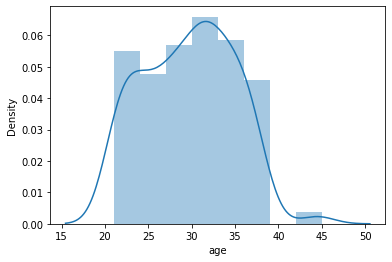

In [25]:
# Plot a histogram that shows the distribution of ages in the dataset:

age = new_df["age"]
sns.distplot(age)
plt.show()

In [26]:
# Find the mean age of urban and rural users:

location_mean_age = new_df.groupby('location').age.mean() # turns it into a series
location_mean_age.head()

location
rural    31.142857
urban    29.609195
Name: age, dtype: float64

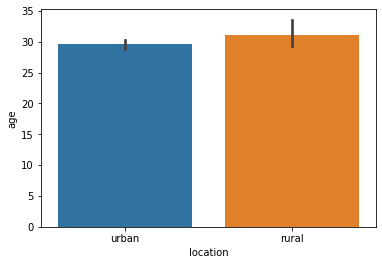

In [27]:
# Graph the age difference between rural and urban using a barplot:

sns.barplot(
	data=new_df,
	x= "location",
	y= "age"
)

plt.show()

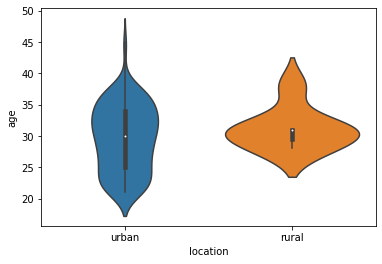

In [28]:
# Plot a violinplot, which shows the distribution of age in different locations:

sns.violinplot(data=new_df, x="location", y="age")
plt.show()

# 6. Model the Data

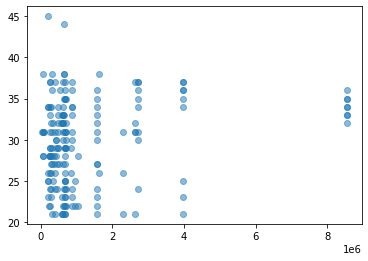

In [29]:
# Graph the population to age as a scatterplot: 

x = new_df['population_proper']
y = new_df['age']

plt.scatter(x, y, alpha=0.5)

plt.show()

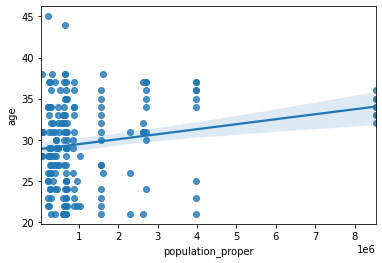

In [30]:
# Use Seaborn to visualize a linear regression: 

sns.regplot(data=new_df, x="population_proper", y="age")

plt.show()

# 7. Communication:

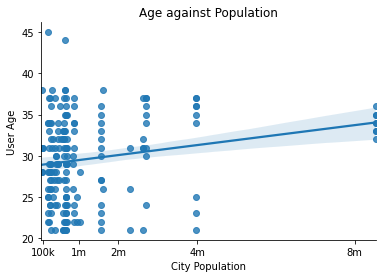

In [31]:
# Now we need to make our visualizations snazzy! 

# Linear regression plot:
sns.regplot(data=new_df, x="population_proper", y="age")

# Change the axes, so they're eaiser to undersatnd:
ax = plt.subplot(1, 1, 1)
ax.set_xticks([100000, 1000000, 2000000, 4000000, 8000000])
ax.set_xticklabels(['100k', '1m', '2m','4m', '8m'])


# Change the figure style and palette:
sns.set_style("white")
sns.set_palette("pastel")
sns.despine()


# Title the axes and plot: 
ax.set_xlabel("City Population") 
ax.set_ylabel("User Age") 
plt.title("Age against Population")


plt.show()

# 8. Reproducibility and Automation
It’s also important to remember that the scientific method requires that your work can be reproduced. In the field of data science, we call this quality reproducibility.

Reproducibility is important because it enables you to reuse and modify experiments, but it is also how the scientific community can confirm your analysis is valid. If your study produces results that no one can reproduce, it is likely that your results are invalid and the product of bias or error.

Another concept tied to reproducibility is the idea of automation. If you’re creating reports, it’s most likely that you’ll be processing the same data at regular intervals. Rather than writing a new program each time, you can write a program that automates these processes, freeing up your time to do even more data science! Automation may be as simple as writing a Python program you can re-use all the way up to building machine learning models.